<a href="https://colab.research.google.com/github/kolbyboyd/Exploration-Of-Tensorflow-X-Keras-Model-Performance-Utilizing-Cifar-10-Deep-Learning-Techniques/blob/main/Exploration%20Of%20Tensorflow%20X%20Keras%20Model%20Performance%20Utilizing%20Cifar-10%20%26%20Deep%20Learning%20Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Image Classification using TensorFlow and Keras
This project demonstrates image classification on the CIFAR-10 dataset using TensorFlow and Keras. It includes code for data preprocessing, model building, training, evaluation, and visualization of results.

## Installation
#### We will be using TensorFlow, Keras, Numpy, and MatPlotLib to accomplish our goal.
#### You can install these required libraries using pip:

In [1]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib

## Importing Necessary Libraries

#### Before we begin training our model, we need to import essential libraries that will be used throughout the process. Each library serves a specific purpose in data preprocessing, model building, training, evaluation, and visualization.

#### Here's a breakdown of the libraries we're importing:

- **numpy**: Used for numerical computing and array manipulation, essential for handling data.
- **matplotlib.pyplot**: Provides plotting functions to visualize data and model performance.
- **tensorflow**: The core library for building and training deep learning models.
- **seaborn**: Offers additional visualization tools to enhance the aesthetics of plots.
- **tensorflow.keras.datasets**: Allows us to easily access standard datasets like CIFAR-10 for training and testing.
- **tensorflow.keras.models**: Provides tools for building neural network models, including Sequential and Model.
- **tensorflow.keras.layers**: Contains various types of layers used to construct neural networks, such as Dense, Conv2D, and Dropout.
- **tensorflow.keras.applications**: Offers pre-trained models like MobileNetV2, which can be used as feature extractors or fine-tuned for specific tasks.
- **tensorflow.keras.preprocessing.image**: Provides utilities for image data preprocessing, including data augmentation.
- **tensorflow.keras.callbacks**: Includes callback functions like ModelCheckpoint to save the best model during training.
- **collections.Counter**: Useful for counting occurrences of elements, which can be helpful for analyzing class distributions.
- **keras.models.load_model**: Allows us to load a pre-trained model for further analysis or evaluation.
- **keras.optimizers.Adam**: An optimization algorithm used to update model parameters during training.
- **keras.utils.to_categorical**: Converts class vectors (integers) to binary class matrices (one-hot encoding).
- **sklearn.metrics**: Provides tools for evaluating model performance, including confusion matrix and classification report.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from collections import Counter
from keras.models import load_model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

## Loading the CIFAR-10 Dataset

#### The CIFAR-10 dataset is a widely used benchmark dataset for image classification tasks. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

#### This line of code loads the CIFAR-10 dataset into memory, splitting it into training and testing sets. The training set `(x_train, y_train)` contains images and their corresponding labels, while the testing set `(x_test, y_test)` is used to evaluate the trained model's performance.

#### The dataset is automatically downloaded from an online repository and cached locally for future use. It provides a standardized and convenient way to access a diverse collection of images for training and testing deep learning models.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


## Visualizing Sample Images from the Dataset

#### Visualization of sample images from the dataset serves as an initial exploration step to gain insights into the data's characteristics and quality. Understanding the dataset's content can help in making informed decisions during model development and preprocessing.

#### In this code snippet, we display a grid of nine random images from the training set. Each image is plotted in a separate subplot, allowing us to inspect multiple samples at once.

#### Key points about the visualization:
- **Figure Size**: The size of the figure is set to (10, 5) to ensure sufficient space for displaying the images.
- **Looping Through Images**: We iterate through the first nine images in the training set (`x_train`) using a for loop.
- **Subplot Configuration**: Images are arranged in a 3x3 grid using `plt.subplot(3, 3, i+1)`, where `i` represents the index of the current image.
- **Image Display**: Each image is shown using `plt.imshow()`, which renders the image in the corresponding subplot.
- **Display**: Finally, `plt.show()` is called to render the entire grid of images for visualization.

#### This visualization provides an initial glimpse into the dataset's contents, helping us assess the image quality, diversity, and potential challenges that may arise during model training.

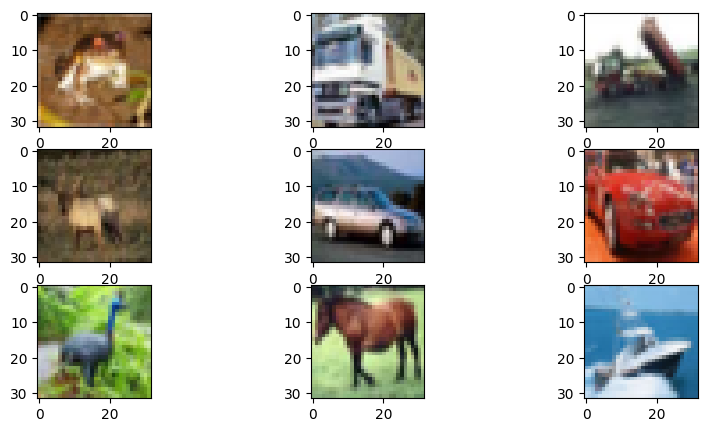

In [4]:
# Display sample images
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()

## Checking the Shape and Class Distribution of the Dataset

#### After loading the dataset, it's crucial to inspect its shape and class distribution to understand the data's structure and balance. This step helps ensure that the dataset is properly loaded and provides insights into potential biases or imbalances that may impact model training.

#### In this code snippet, we perform the following actions:
1. **Printing Data Shapes**: We print the shapes of the training and testing datasets to confirm the number of images and their dimensions. This includes the shape of both the input images (`x_train`, `x_test`) and their corresponding labels (`y_train`, `y_test`).
2. **Exploring Class Distribution**: Additionally, we explore the class distribution within the training dataset to understand the frequency of each class. This information is valuable for assessing class balance and identifying any potential biases in the dataset.

#### Key points:
- **Data Shapes**: The shapes of the training and testing datasets provide insights into the dataset's size and structure. It confirms the number of images and their dimensions, ensuring consistency and compatibility with model architecture.
- **Class Distribution**: The class distribution analysis reveals the frequency of each class in the training dataset. It helps identify if certain classes are overrepresented or underrepresented, which can influence model training and performance.

#### By examining the dataset's shape and class distribution, we gain essential insights into its characteristics, enabling us to make informed decisions during model development and evaluation.

In [5]:
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

# Explore class distribution (if using a standard dataset)
# Explore class distribution
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train, axis=1)).most_common(10))

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Class Distribution (Top 10):
[(0, 50000)]


## Image Preprocessing: Normalizing Pixel Values

#### Before feeding the images into the neural network model, it's essential to preprocess them to ensure uniformity and enhance model convergence. One common preprocessing step is normalization, where the pixel values of the images are scaled to a standard range.

#### In this code snippet, we perform the following preprocessing step:
- **Normalization**: The pixel values of both the training and testing images (`x_train` and `x_test`, respectively) are normalized by dividing each pixel value by 255.0. This operation scales the pixel values to a range between 0 and 1, making them suitable for input to the neural network.

#### Key points:
- **Normalization Purpose**: Normalizing the pixel values ensures that they fall within a consistent range, which can improve model convergence and stability during training.
- **Data Type Conversion**: Before normalization, the data type of the pixel values is explicitly converted to `float32` to facilitate accurate division.
- **Scaling Range**: Dividing by 255.0 scales the pixel values to a range between 0 and 1, preserving the relative intensity information of the images.

#### Normalizing pixel values is a fundamental preprocessing step that helps prepare the image data for effective training and enhances the model's ability to learn meaningful patterns from the data.


In [6]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Image Preprocessing: Resizing Images

#### Resizing images to a consistent size is a crucial preprocessing step in image classification tasks, ensuring uniformity in input dimensions across all images. In this code snippet, we perform resizing of images to prepare them for model input.

#### Key steps in this preprocessing section include:
- **Defining Batch Size**: We define the batch size, which determines the number of images processed simultaneously during training and testing.
- **Creating TensorFlow Datasets**: TensorFlow datasets are created from the training and testing image arrays (`x_train` and `x_test`, respectively).
- **Resizing Images**: Images are resized to a consistent size of (128, 128) using the `tf.image.resize` function. This ensures that all images have the same dimensions, facilitating consistent input to the neural network model.

#### Key points:
- **Uniform Input Size**: Resizing images to a consistent size eliminates variations in image dimensions, enabling seamless integration into the model architecture.
- **Batch Processing**: Images are resized in batches during both training and testing phases, enhancing computational efficiency and memory utilization.
- **Preservation of Aspect Ratio**: The `tf.image.resize` function resizes images while preserving their aspect ratio, ensuring that the image content remains intact.

#### By resizing images to a standardized size, we ensure compatibility with the model's input requirements and facilitate effective learning of features and patterns from the image data.

In [7]:
# Define batch size
batch_size = 32
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
test_dataset = tf.data.Dataset.from_tensor_slices(x_test)
# Resize images in batches during training
train_dataset = train_dataset.batch(batch_size).map(lambda x: tf.image.resize(x, (128, 128)))
# Resize images in batches during testing
test_dataset = test_dataset.batch(batch_size).map(lambda x: tf.image.resize(x, (128, 128)))

## Data Augmentation: Enhancing Dataset Diversity

#### Data augmentation is a crucial technique employed in training deep learning models to increase the diversity and robustness of the dataset. By applying various transformations to the existing images, we can create new training examples, thereby reducing overfitting and improving generalization performance.

#### Key components of this data augmentation section include:
- **ImageDataGenerator Configuration**: We use the `ImageDataGenerator` class provided by Keras to perform data augmentation. This class allows us to define a wide range of augmentation parameters.
- **Experimenting with Parameters**: The code snippet showcases some example data augmentation parameters that can be adjusted to explore different augmentation techniques. Parameters such as `rotation_range`, `width_shift_range`, `height_shift_range`, and `horizontal_flip` control the types and degrees of transformations applied to the images.
- **Guidelines for Parameter Adjustment**:
  - *Start with Small Adjustments*: Begin by making small adjustments to the parameters to observe their effects clearly on the augmented images.
  - *Consider Dataset Characteristics*: Choose augmentation techniques that are appropriate for the characteristics of your dataset. For example, flipping images horizontally might be suitable for certain datasets, while excessive rotation might distort the content.
  - *Explore Additional Parameters*: Experiment with additional augmentation parameters such as `shear_range` and `zoom_range` to further diversify the dataset.
- **Visualization of Augmented Images**: After configuring the `ImageDataGenerator`, it's beneficial to visualize a few randomly augmented images from the dataset to understand how the chosen parameters affect the appearance of the images. This visual inspection helps in fine-tuning the augmentation parameters to achieve the desired augmentation effects.

#### By applying data augmentation techniques, we can effectively increase the variability of the training dataset, leading to improved model performance and robustness against real-world variations.

In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

## Model Building: Constructing the Convolutional Neural Network (CNN)

#### The model building stage involves creating a convolutional neural network (CNN) architecture for image classification. Key steps and components of this section include:
- **Choice of Pre-Trained Model**: In this example, we opt to use a pre-trained model called MobileNetV2. Pre-trained models like VGG16, ResNet50, and MobileNetV2 are popular choices due to their effectiveness in feature extraction tasks.
- **Loading Pre-Trained Weights**: The `MobileNetV2` model is initialized with weights pre-trained on the ImageNet dataset, which helps in capturing rich hierarchical features from images.
- **Freezing Pre-Trained Layers**: To leverage the knowledge learned by the pre-trained model while training our classifier, we freeze some layers of the `MobileNetV2` model. Freezing prevents the weights of these layers from being updated during training, ensuring that the learned features remain intact.
- **Adding Custom Classification Layers**: We append additional layers on top of the pre-trained base model to tailor it for our specific classification task. These custom layers include a `Flatten` layer to convert the output of the convolutional layers into a 1D feature vector, followed by fully connected (`Dense`) layers with ReLU activation functions to learn complex patterns in the data. A `Dropout` layer is included to mitigate overfitting by randomly deactivating a fraction of neurons during training.
- **Model Compilation**: After defining the architecture, we compile the model by specifying the optimizer (e.g., Adam), the loss function (e.g., categorical cross-entropy for multi-class classification), and the evaluation metric (e.g., accuracy).
- **Model Summary**: It's beneficial to inspect the summary of the model architecture to understand the number of parameters and the flow of data through different layers.

#### By building the CNN architecture and configuring it for our classification task, we establish the foundation for subsequent model training and evaluation stages.

In [9]:
# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze some layers of the pre-trained model
for layer in base_model.layers[:-10]:
    layer.trainable = False
num_classes = 10
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


## Compilation: Configuring the Model for Training

#### The compilation step involves configuring the model for the training process. Key aspects of this stage include:
- **Optimizer Selection**: Here, we choose the Adam optimizer, a popular choice for gradient-based optimization algorithms. Adam adapts learning rates for each parameter, providing efficient convergence and robustness to noisy gradients.
- **Loss Function Definition**: For this multi-class classification task, we use sparse categorical cross-entropy as the loss function. It calculates the cross-entropy loss between the true labels and the predicted probabilities, with sparse categorical cross-entropy specifically designed for integer-encoded target labels.
- **Performance Metrics Specification**: We specify 'accuracy' as the performance metric to monitor during training. Accuracy measures the proportion of correctly classified images in the training data and is a common metric for evaluating classification models.

#### By compiling the model with appropriate optimizer, loss function, and evaluation metrics, we prepare it for the training phase, where it learns to make accurate predictions on unseen data.

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Checkpointing: Saving the Best Model Automatically

#### ModelCheckpoint is a callback function in Keras that automatically saves the model's weights during training. Key attributes include:
- **File Path Specification**: We specify the file path where the model weights will be saved. In this example, the best performing model will be saved as 'best_model.h5'.
- **Saving Only the Best Model**: By setting `save_best_only=True`, ModelCheckpoint saves only the model weights that yield the lowest validation loss. This prevents overfitting by preserving the model with the best generalization performance.
- **Monitoring Metric**: ModelCheckpoint monitors the validation loss (`monitor='val_loss'`) to determine the best model. When the validation loss decreases, indicating improved performance, the model weights are saved.
- **Mode Specification**: In this case, `mode='min'` indicates that the monitored quantity (validation loss) should be minimized. Alternatively, for metrics like accuracy, `mode='max'` would be appropriate.

#### ModelCheckpoint ensures that the best performing model is saved automatically during training, allowing us to access the model with optimal generalization performance for future use.

In [11]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

## Model Training: Training the Model with Data Augmentation

#### The `fit` method in Keras is used to train the model on the training data. Key parameters include:
- **Training Data Generator**: Instead of passing raw training data directly, we use `datagen.flow(x_train, y_train, batch_size=32)` to generate batches of augmented training data on-the-fly. This allows for dynamic augmentation during training, enhancing model generalization.
- **Number of Epochs**: We specify the number of training epochs (`epochs=20`) to define how many times the entire training dataset will be passed forward and backward through the neural network. Adjust this parameter based on convergence and computational resources.
- **Validation Data**: Validation data (`validation_data=(x_test, y_test)`) is used to monitor the model's performance on unseen data during training. This helps to detect overfitting and guides model optimization.
- **Callbacks**: We include the `checkpoint` callback to save the best performing model weights based on validation loss. The ModelCheckpoint callback ensures that the model with the lowest validation loss is saved automatically.

#### The `fit` method returns a history object containing training metrics such as loss and accuracy, which can be used for further analysis and visualization.

In [12]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=20,  # Adjust as needed
    validation_data=(x_test, y_test),
    callbacks=[checkpoint]
)

Epoch 1/20
1563/1563 [==============================] - ETA: 0s - loss: 1.7782 - accuracy: 0.0997
Epoch 1: val_loss improved from inf to 1.90655, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 73s 37ms/step - loss: 1.7782 - accuracy: 0.0997 - val_loss: 1.9065 - val_accuracy: 0.0578
Epoch 2/20
1563/1563 [==============================] - ETA: 0s - loss: 1.6049 - accuracy: 0.0942
Epoch 2: val_loss did not improve from 1.90655
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6049 - accuracy: 0.0942 - val_loss: 2.0065 - val_accuracy: 0.0497
Epoch 3/20
1563/1563 [==============================] - ETA: 0s - loss: 1.5673 - accuracy: 0.0931
Epoch 3: val_loss improved from 1.90655 to 1.54732, saving model to best_model.h5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5673 - accuracy: 0.0931 - val_loss: 1.5473 - val_accuracy: 0.1483
Epoch 4/20
1561/1563 [============================>.] - ETA: 0s - loss: 1.5392 - accuracy: 0.0954
Epoch 4: val_loss improved from 1.54732 to 1.39940, saving model to best_model.h5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.5395 - accuracy: 0.09

## Enhanced Model Training with Data Augmentation

#### This section outlines enhanced model training techniques, including data augmentation and callback implementation.
- **Data Augmentation**: Data augmentation is integrated into the training loop using the `ImageDataGenerator` class from Keras. Augmentation parameters such as rotation, width and height shifts, horizontal flipping, shear range, and zoom range are defined to generate augmented images on-the-fly during training. This technique helps to increase the diversity and size of the training dataset, reducing overfitting and improving model generalization.
- **One-Hot Encoding**: Target labels (`y_train` and `y_test`) are one-hot encoded using the `to_categorical` function. This transforms integer labels into binary vectors, which are easier for the neural network to process during training.
- **ModelCheckpoint Callback**: A `ModelCheckpoint` callback is defined to save the best performing model based on validation accuracy (`monitor='val_accuracy'`). The callback is configured to save only the model with the highest validation accuracy, ensuring that the best model is retained for future use.
- **Training Loop Modification**: The training loop is modified to utilize the augmented data generated by `datagen_train.flow(x_train, y_train, batch_size=32)`. This ensures that data augmentation is applied in real-time during training. The validation set (`x_test, y_test`) is used to monitor the model's performance on unseen data during training. Additionally, the `callbacks` parameter includes the `checkpoint` callback to save the best model.


In [13]:
# One-hot encode the target labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
# Define the ImageDataGenerator for data augmentation
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)
datagen_train.fit(x_train)
# Define ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_accuracy_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
# Train the model with data augmentation
history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint]
)

Epoch 1/20
1563/1563 [==============================] - ETA: 0s - loss: 1.3586 - accuracy: 0.0966
Epoch 1: val_accuracy improved from -inf to 0.08840, saving model to best_accuracy_model.h5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3586 - accuracy: 0.0966 - val_loss: 1.1756 - val_accuracy: 0.0884
Epoch 2/20
1562/1563 [============================>.] - ETA: 0s - loss: 1.3577 - accuracy: 0.0974
Epoch 2: val_accuracy did not improve from 0.08840
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3577 - accuracy: 0.0974 - val_loss: 1.1896 - val_accuracy: 0.0877
Epoch 3/20
1561/1563 [============================>.] - ETA: 0s - loss: 1.3496 - accuracy: 0.0962
Epoch 3: val_accuracy did not improve from 0.08840
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3497 - accuracy: 0.0962 - val_loss: 1.1960 - val_accuracy: 0.0735
Epoch 4/20
1561/1563 [============================>.] - ETA: 0s - loss: 1.3499 - accuracy: 0.0945
Epoch 4: 

## Visualizing Training Progress

#### This section focuses on visualizing the training progress of the model by plotting training and validation accuracy/loss curves.
- **Importance of Monitoring**: Monitoring validation metrics such as accuracy and loss is crucial for identifying potential issues like overfitting or underfitting during model training. By comparing the performance on both training and validation sets, we can assess how well the model generalizes to unseen data. Discrepancies between the training and validation curves may indicate overfitting (when the training accuracy is much higher than the validation accuracy) or underfitting (when both accuracies remain low).
- **Plotting Curves**: Two types of curves are plotted:
  - *Accuracy Curves*: These curves display the accuracy of the model on both the training and validation datasets over epochs. A rising accuracy indicates improvement in model performance, while fluctuating or diverging curves may signal overfitting.
  - *Loss Curves*: These curves show the training and validation losses over epochs. Lower loss values indicate better model convergence and predictive performance. Similar to accuracy curves, discrepancies between training and validation losses can indicate overfitting or underfitting.


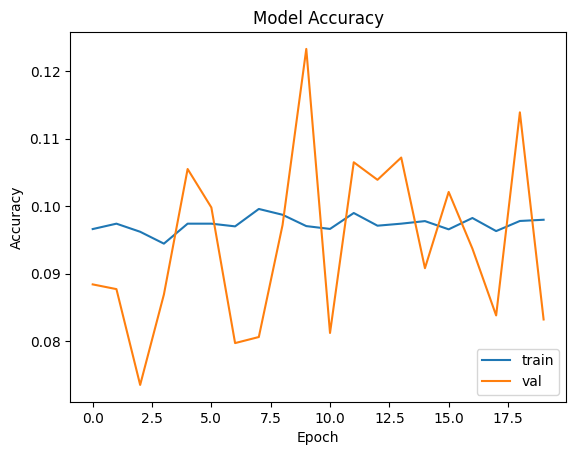

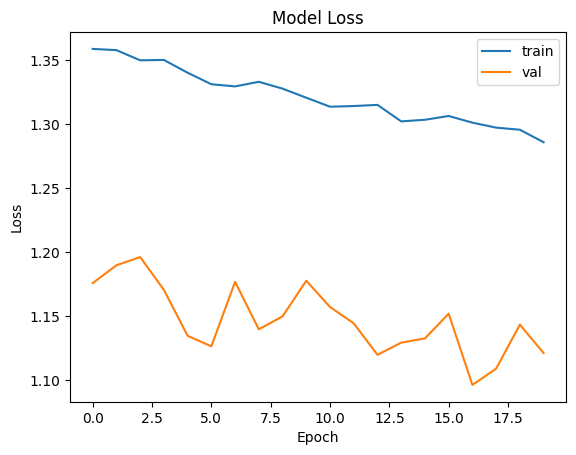

In [14]:
# Plot training and validation curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## Evaluation on the Test Set

#### This section focuses on evaluating the trained model on the test set and discusses why test set metrics provide an unbiased assessment of model performance.
- **Unbiased Assessment**: The test set metrics, including loss and accuracy, provide an unbiased evaluation of the model's performance on unseen data. Unlike training and validation sets, the test set is not used during model training or hyperparameter tuning. Therefore, its performance metrics reflect how well the model generalizes to new, unseen samples.
- **Loading the Best Model**: The best-performing model (based on validation accuracy) is loaded using the `load_model` function. This ensures that the evaluation is conducted on the model variant that exhibited the highest performance on the validation set during training.
- **Calculating Test Metrics**: Test loss and accuracy are computed using the `evaluate` method on the loaded model with the test data. The test loss represents the model's prediction error on the test set, while test accuracy indicates the proportion of correctly classified samples out of the total test set.
- **Interpreting Test Metrics**: Understanding the test loss and accuracy is essential for assessing the model's overall performance. A low test loss and high test accuracy suggest that the model performs well on unseen data and generalizes effectively. Conversely, high test loss or low test accuracy may indicate issues such as overfitting or insufficient model capacity.


In [15]:
best_model = load_model('best_accuracy_model.h5')
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 1.1775 - accuracy: 0.1233
Test Loss: 1.177524209022522
Test Accuracy: 0.12330000102519989


## Target Label Shape Analysis

#### This section provides an analysis of the shape of target labels (`y_train` and `y_test`) before training.
- **Shape Analysis**: The shapes of the target labels are printed using the `shape` attribute. This helps to confirm the dimensions of the target label arrays, indicating the number of samples and the number of classes.
- **Interpretation**: Understanding the shape of target labels is crucial for model training and evaluation. It ensures that the data is correctly formatted and compatible with the model architecture and loss function.

In [16]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (50000, 1)
Shape of y_test: (10000, 1)


## One-Hot Encoding of Target Labels

#### This section converts the target labels (`y_train` and `y_test`) to one-hot encoded format.
- **One-Hot Encoding**: The `to_categorical` function from Keras is used to convert integer labels to one-hot encoded vectors. Each label is transformed into a binary vector where only one bit is high (1) and the others are low (0).
- **Shape Analysis**: After one-hot encoding, the shapes of the encoded target labels (`y_train_encoded` and `y_test_encoded`) are printed to confirm the transformation. This ensures that the encoding process was successful and that the dimensions are appropriate for model training and evaluation.

In [17]:
# Convert the target labels to one-hot encoded format
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of y_train_encoded: (50000, 10)
Shape of y_test_encoded: (10000, 10)


## Model Creation and Training with Different Learning Rates

#### This section defines a function `create_model` to build a convolutional neural network (CNN) for image classification.
- **Model Architecture**: The CNN architecture includes convolutional layers, max-pooling layers, flattening layer, dense layers, and dropout regularization.
- **Compilation**: The model is compiled using the Adam optimizer with a specified learning rate and categorical cross-entropy loss function. Accuracy is chosen as the metric for evaluation.
- **Training Loop**: The code then trains the model using different learning rates specified in the loop (`[0.01, 0.001, 0.0001]`). For each learning rate, a new model is created and trained for a fixed number of epochs (10) using the training dataset (`x_train` and `y_train_encoded`). The validation data (`x_test` and `y_test_encoded`) are used to monitor performance during training.

In [18]:
def create_model(learning_rate=0.01):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model
# Training with different learning rates
for lr in [0.01, 0.001, 0.0001]:
    model = create_model(learning_rate=lr)
    history = model.fit(x_train, y_train_encoded, epochs=10, validation_data=(x_test, y_test_encoded))

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 2.0623 - accuracy: 0.2396 - val_loss: 1.8739 - val_accuracy: 0.3126
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9842 - accuracy: 0.2668 - val_loss: 1.9093 - val_accuracy: 0.2942
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9626 - accuracy: 0.2747 - val_loss: 1.8391 - val_accuracy: 0.3244
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9470 - accuracy: 0.2799 - val_loss: 1.9735 - val_accuracy: 0.2726
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9511 - accuracy: 0.2823 - val_loss: 1.8624 - val_accuracy: 0.3172
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9339 - accuracy: 0.2847 - val_loss: 1.8561 - val_accuracy: 0.3110
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9331 - accuracy: 0.2876 - val_loss: 1.8525 - val_accuracy:

## Model Evaluation Function

#### This code defines a function `evaluate_model` to evaluate the performance of a trained model on test data.
- **Function Definition**: The function takes three arguments: the trained model, the test data (`x_test`), and the one-hot encoded test labels (`y_test_encoded`).
- **One-Hot Encoding**: Before evaluation, the integer label array `y_test` is converted to one-hot encoded format using the `to_categorical` function to match the model's output format.
- **Evaluation**: The function then evaluates the model on the test data and prints the test loss and accuracy.

In [19]:
# Define evaluate_model function
def evaluate_model(model, x_test, y_test_encoded):

# Assuming y_test is the integer label array
    y_test_encoded = to_categorical(y_test)

# Now, pass y_test_encoded to the evaluate_model function
    evaluate_model(model, x_test, y_test_encoded)

## Model Prediction and Shape Comparison

#### This code assumes that the model has been trained and predictions have been made on the test data.
- **Model Prediction**: The code calculates predictions (`y_pred`) using the trained model on the test data (`x_test`).
- **Shape Comparison**: It then prints the shape of the predicted labels array (`y_pred`) and the shape of the one-hot encoded test labels array (`y_test_encoded`). This comparison helps ensure consistency between the shapes of predicted and actual labels for further analysis.


In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("Shape of y_pred:", y_pred.shape)

print("Shape of y_pred:", y_pred.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

313/313 [==============================] - 1s 2ms/step
Shape of y_pred: (10000, 10)
Shape of y_pred: (10000, 10)
Shape of y_test_encoded: (10000, 10)


## Model Evaluation and Visualization

#### This code segment involves visualizing the training curves and evaluating the model's performance on the test data.
- **Plotting Training Curves**: The `plot_curves` function plots the training and validation accuracy as well as the training and validation loss curves over epochs. It also includes the learning rate used in the title for reference.
- **Model Evaluation**: The `evaluate_model` function evaluates the model on the test data and prints out the test loss and accuracy.
- **Usage Example**: The code then demonstrates how to use these functions by passing the training history (`history`) and learning rate (`lr`) to `plot_curves`, and the trained model (`model`), test data (`x_test`, `y_test`), and encoded test labels (`y_test_encoded`) to `evaluate_model`.


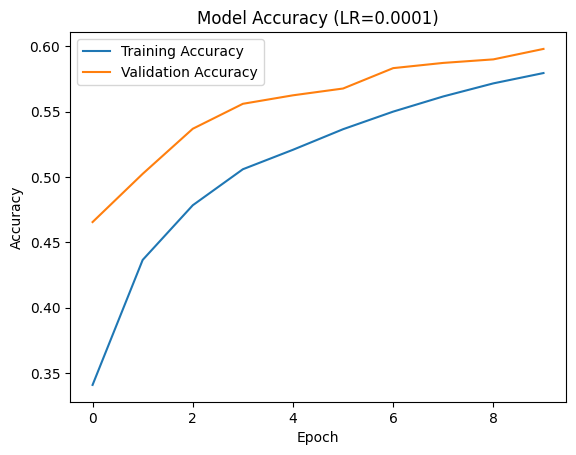

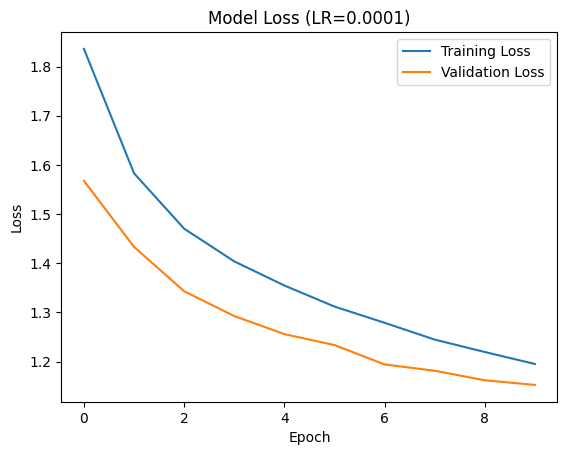

Test Loss: 1.1526790857315063
Test Accuracy: 0.5981000065803528


In [21]:
# Plot the training curves and evaluate the model once more.
def plot_curves(history, learning_rate):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy (LR={learning_rate})')  # Include learning rate in the title
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss (LR={learning_rate})')  # Include learning rate in the title
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print('Test Loss:', test_loss)
    print('Test Accuracy:', test_accuracy)
# Assuming `history` contains the training history of a model and `lr` is the learning rate used
plot_curves(history, lr)
# Assuming `model` is the trained model and `x_test`, `y_test` are the test data
evaluate_model(model, x_test, y_test_encoded)

## Confusion Matrix and Classification Report

#### This code section involves generating and visualizing the confusion matrix, as well as calculating the classification report.
- **Confusion Matrix Generation**: The confusion matrix (`cm`) is generated using the true labels (`y_test`) and the predicted labels (`y_pred_classes`).
- **Visualization**: The confusion matrix is printed and visualized as a heatmap using seaborn's `heatmap` function. This provides a visual representation of the model's performance in predicting each class.
- **Classification Report**: The classification report is calculated using `classification_report` from sklearn.metrics. It provides a comprehensive summary of the model's performance, including precision, recall, F1-score, and support for each class.


Confusion Matrix:
[[630  35  32  14  13   8  15  11 174  68]
 [ 25 745   6   3   2   2  14   6  47 150]
 [ 98  14 353  57 141  85 119  61  43  29]
 [ 16  22  63 339  83 185 129  70  36  57]
 [ 39  12  86  48 498  37 113 128  27  12]
 [ 19   5  61 160  69 466  58 108  28  26]
 [  8  10  42  46  62  19 756  18  13  26]
 [ 22   9  25  29  59  73  19 697  13  54]
 [ 66  63   6   9   4   9   6   7 772  58]
 [ 32 133  10   8   2  10  17  18  45 725]]


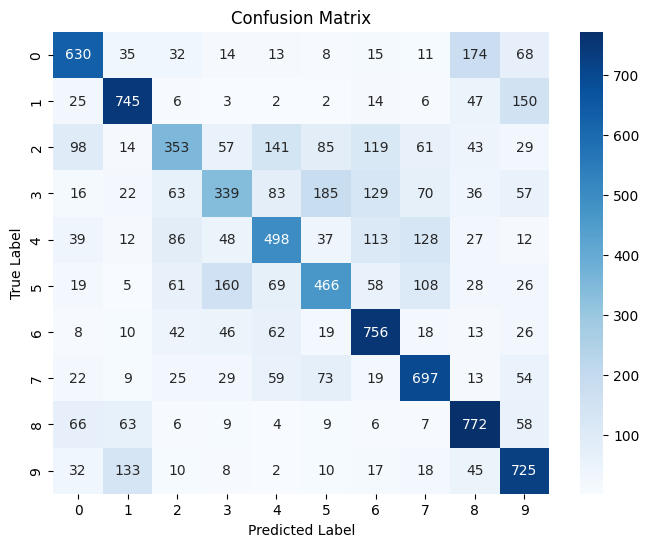

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.63      0.64      1000
           1       0.71      0.74      0.73      1000
           2       0.52      0.35      0.42      1000
           3       0.48      0.34      0.40      1000
           4       0.53      0.50      0.52      1000
           5       0.52      0.47      0.49      1000
           6       0.61      0.76      0.67      1000
           7       0.62      0.70      0.66      1000
           8       0.64      0.77      0.70      1000
           9       0.60      0.72      0.66      1000

    accuracy                           0.60     10000
   macro avg       0.59      0.60      0.59     10000
weighted avg       0.59      0.60      0.59     10000



In [22]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
# Print confusion matrix
print("Confusion Matrix:")
print(cm)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Calculate classification report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)

## Model Evaluation on Test Data

#### This code section evaluates the trained model on the testing data and prints out the test loss and accuracy.
- **Evaluation**: The `evaluate` method is used to evaluate the model's performance on the test dataset (`x_test` and `y_test_encoded`).
- **Metrics**: The test loss (`test_loss`) and test accuracy (`test_accuracy`) are printed to provide insights into the model's performance on unseen data.

In [23]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 1.1526790857315063
Test Accuracy: 0.5981000065803528


## Conclusion

This project demonstrates the complete workflow of image classification using TensorFlow and Keras on the CIFAR-10 dataset.
By following this example, users can understand how to build, train, evaluate, and visualize CNN models for image classification tasks.
Future work may involve experimenting with different architectures, optimization techniques, and datasets for further improvement.
This project provides a comprehensive demonstration of image classification using TensorFlow and Keras on the CIFAR-10 dataset. Through the detailed code explanations and examples, users can gain a deep understanding of various stages of the machine learning pipeline, including data preprocessing, model building, training, evaluation, and visualization.

By following the examples and guidelines presented in this documentation, users can leverage TensorFlow and Keras to develop and train their own image classification models on different datasets. The flexibility of the code allows for easy experimentation with different architectures, hyperparameters, and optimization techniques, empowering users to adapt the workflow to their specific use cases.

Furthermore, the integration of advanced techniques such as data augmentation, model checkpointing, and visualization enhances the robustness and interpretability of the developed models. This project serves as a valuable resource for both beginners and experienced practitioners seeking to delve into image classification with deep learning.

Future directions for this project may involve exploring more advanced architectures, conducting hyperparameter tuning experiments, and applying transfer learning on larger and more complex datasets to further improve model performance and generalization capabilities.